In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def build_alexnet(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        # First Convolutional Layer
        tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Second Convolutional Layer
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Third Convolutional Layer
        tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'),

        # Fully Connected Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model


In [3]:
def compile_and_train(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=32):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    _, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    return history


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to calculate performance metrics and loss
def evaluate_model(model, x_test, y_test):
    # Predict on test set
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Print classification report
    print(classification_report(y_true, y_pred_classes))

    # Return metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Function to plot loss curves
def plot_loss_curves(history, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curves for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot performance metrics
def plot_metrics(metrics_dict, model_name):
    metrics_names = list(metrics_dict.keys())
    metrics_values = list(metrics_dict.values())

    plt.figure(figsize=(8, 5))
    plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'salmon', 'purple'])
    plt.title(f'Performance Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics_values):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



In [5]:
# Build and train the modified AlexNet
alexnet = build_alexnet()
history_alexnet = compile_and_train(alexnet, x_train, y_train, x_test, y_test, epochs=20)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7977 - loss: 0.5534 - val_accuracy: 0.8933 - val_loss: 0.2961
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9064 - loss: 0.2553 - val_accuracy: 0.9036 - val_loss: 0.2656
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9213 - loss: 0.2075 - val_accuracy: 0.9088 - val_loss: 0.2487
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9358 - loss: 0.1731 - val_accuracy: 0.9174 - val_loss: 0.2305
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9471 - loss: 0.1410 - val_accuracy: 0.9167 - val_loss: 0.2509
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9558 - loss: 0.1160 - val_accuracy: 0.9222 - val_loss: 0.2563
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.0947 - val_accuracy: 0.9199 - val_loss: 0.2790
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9715 - loss: 0.0754 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.85      0.87      1000
           3       0.91      0.94      0.92      1000
           4       0.82      0.90      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.79      0.74      0.77      1000
           7       0.97      0.98      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

{'accuracy': 0.9194, 'precision': 0.919409589276108, 'recall': 0.9194000000000001, 'f1_score': 0.9190412516527078}


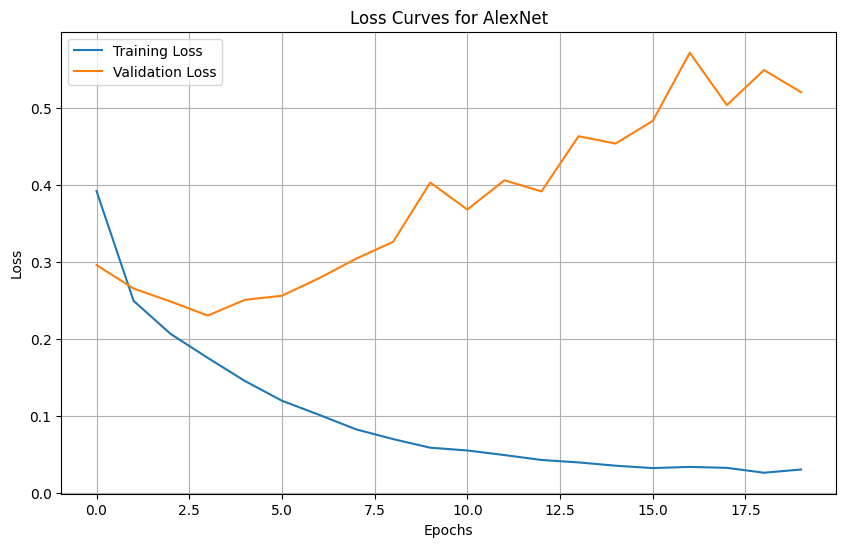

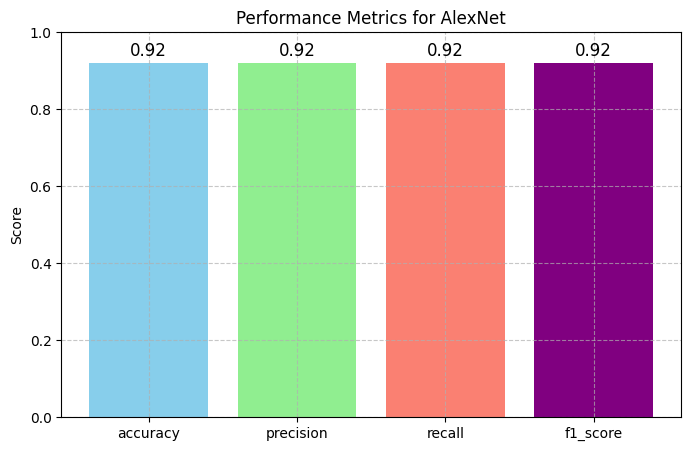

In [6]:
metrics_alexnet = evaluate_model(alexnet, x_test, y_test)
print(metrics_alexnet)
plot_loss_curves(history_alexnet, "AlexNet")
plot_metrics(metrics_alexnet, "AlexNet")

In [7]:
def inception_module(x, filters):
    # 1x1 convolution
    conv1x1 = tf.keras.layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 convolution
    conv3x3 = tf.keras.layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    # 5x5 convolution
    conv5x5 = tf.keras.layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    # Max pooling followed by 1x1 convolution
    pool = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool = tf.keras.layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool)

    # Concatenate all branches
    return tf.keras.layers.concatenate([conv1x1, conv3x3, conv5x5, pool], axis=-1)


def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolution and pooling
    x = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Inception modules
    x = inception_module(x, [16, 16, 16, 16])
    x = inception_module(x, [32, 32, 32, 32])

    # Global Average Pooling and fully connected layers
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model


In [8]:
# Build and train the modified GoogLeNet
googlenet = build_googlenet()
history_googlenet = compile_and_train(googlenet, x_train, y_train, x_test, y_test, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6047 - loss: 1.0413 - val_accuracy: 0.7569 - val_loss: 0.6528
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7965 - loss: 0.5429 - val_accuracy: 0.8283 - val_loss: 0.4682
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8397 - loss: 0.4403 - val_accuracy: 0.8413 - val_loss: 0.4458
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8612 - loss: 0.3824 - val_accuracy: 0.8696 - val_loss: 0.3662
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8781 - loss: 0.3342 - val_accuracy: 0.8728 - val_loss: 0.3516
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8892 - loss: 0.3050 - val_accuracy: 0.8904 - val_loss: 0.3066
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8955 - loss: 0.2818 - val_accuracy: 0.8890 - val_loss: 0.3117
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9017 - loss: 0.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1000
           1       0.98      0.99      0.98      1000
           2       0.91      0.86      0.88      1000
           3       0.94      0.89      0.91      1000
           4       0.84      0.92      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.80      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

{'accuracy': 0.9176, 'precision': 0.9196072196064173, 'recall': 0.9175999999999999, 'f1_score': 0.9180057291093011}


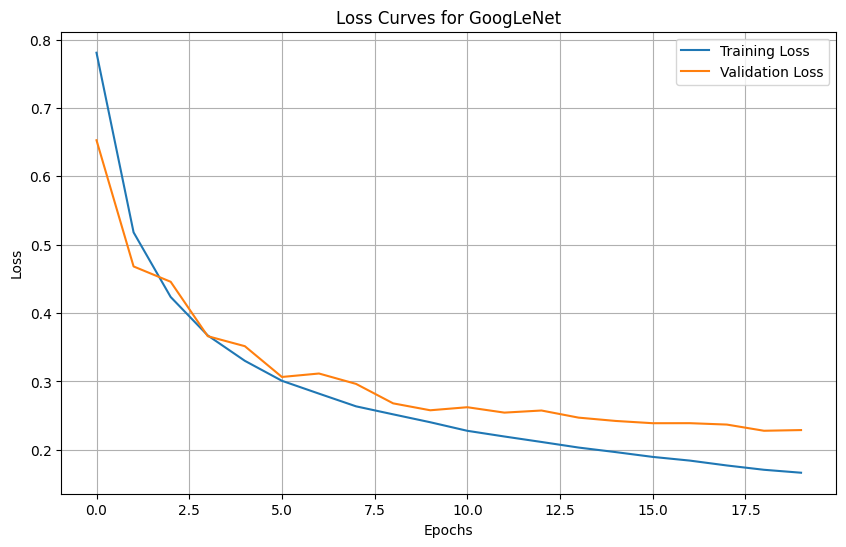

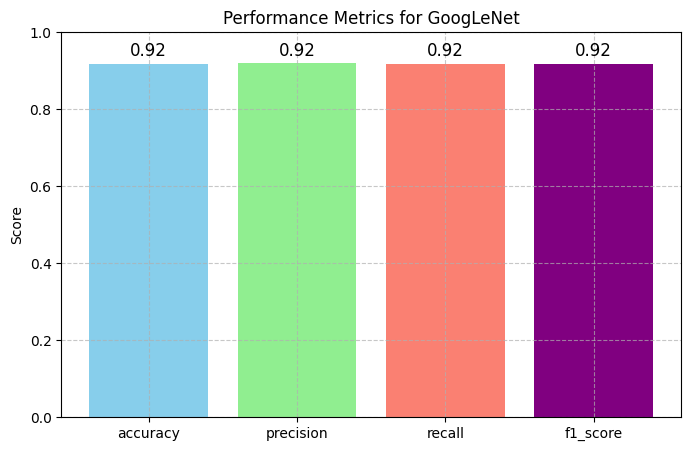

In [9]:
metrics_googlenet = evaluate_model(googlenet, x_test, y_test)
print(metrics_googlenet)
plot_loss_curves(history_googlenet, "GoogLeNet")
plot_metrics(metrics_googlenet, "GoogLeNet")

In [10]:
def build_custom_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build, compile, and train the customized VGG16 model
custom_vgg16_model = build_custom_vgg16(input_shape=(28, 28, 1), num_classes=10)
custom_vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_vgg16 = custom_vgg16_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7831 - loss: 0.5931 - val_accuracy: 0.8961 - val_loss: 0.2906
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9115 - loss: 0.2409 - val_accuracy: 0.9122 - val_loss: 0.2444
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9333 - loss: 0.1830 - val_accuracy: 0.9190 - val_loss: 0.2181
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9450 - loss: 0.1497 - val_accuracy: 0.9295 - val_loss: 0.2021
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9563 - loss: 0.1160 - val_accuracy: 0.9287 - val_loss: 0.2040
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9683 - loss: 0.0862 - val_accuracy: 0.9245 - val_loss: 0.2455
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9768 - loss: 0.0629 - val_accuracy: 0.9289 - val_loss: 0.2426
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9837 - loss: 0.0446 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1000
           1       1.00      0.99      0.99      1000
           2       0.90      0.90      0.90      1000
           3       0.94      0.93      0.94      1000
           4       0.87      0.92      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.85      0.73      0.79      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

{'accuracy': 0.9299, 'precision': 0.9300612197796172, 'recall': 0.9299000000000002, 'f1_score': 0.9292743272292799}


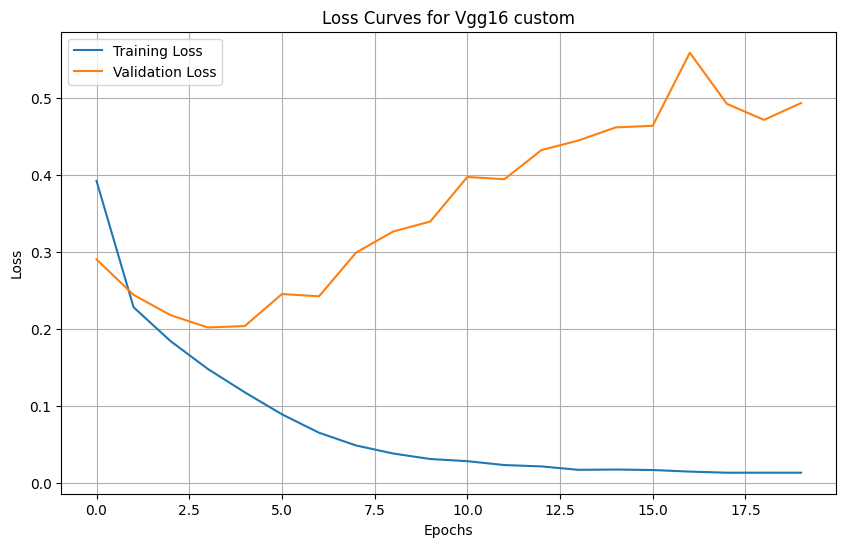

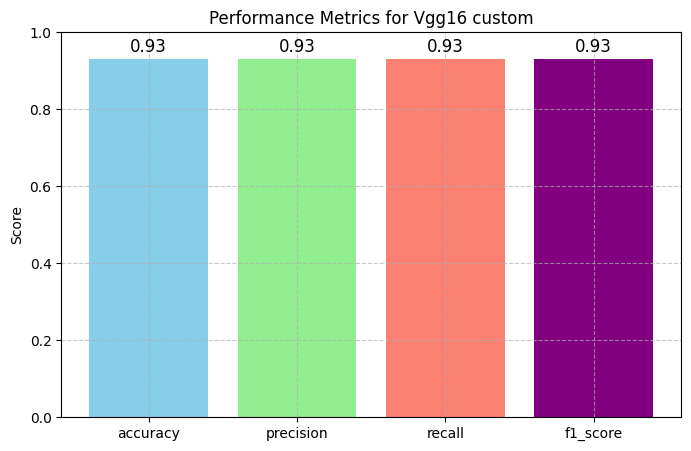

In [11]:
metrics_vgg = evaluate_model(custom_vgg16_model, x_test, y_test)
print(metrics_vgg)
plot_loss_curves(history_custom_vgg16, "Vgg16 custom")
plot_metrics(metrics_vgg, "Vgg16 custom")

In [12]:
def build_custom_xception(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.SeparableConv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Compile and train the custom Xception model
custom_xception_model = build_custom_xception(input_shape=(28, 28, 1), num_classes=10)
custom_xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_xception = custom_xception_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3468 - loss: 1.7653 - val_accuracy: 0.6816 - val_loss: 0.8713
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6943 - loss: 0.8246 - val_accuracy: 0.7240 - val_loss: 0.7685
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7325 - loss: 0.7361 - val_accuracy: 0.7568 - val_loss: 0.6884
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7595 - loss: 0.6686 - val_accuracy: 0.7704 - val_loss: 0.6486
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7738 - loss: 0.6317 - val_accuracy: 0.7844 - val_loss: 0.6031
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7864 - loss: 0.5939 - val_accuracy: 0.7875 - val_loss: 0.5922
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7938 - loss: 0.5697 - val_accuracy: 0.7981 - val_loss: 0.5707
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8049 - loss: 0.5449 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.77      0.78      1000
           3       0.87      0.85      0.86      1000
           4       0.67      0.84      0.74      1000
           5       0.98      0.94      0.96      1000
           6       0.63      0.47      0.54      1000
           7       0.89      0.97      0.93      1000
           8       0.97      0.94      0.96      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

{'accuracy': 0.8483, 'precision': 0.8500645669817031, 'recall': 0.8482999999999998, 'f1_score': 0.846455389242543}


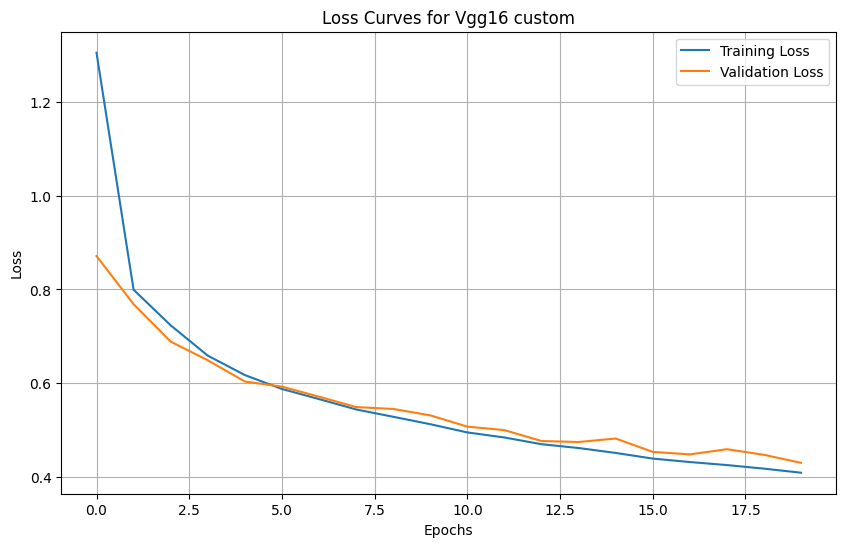

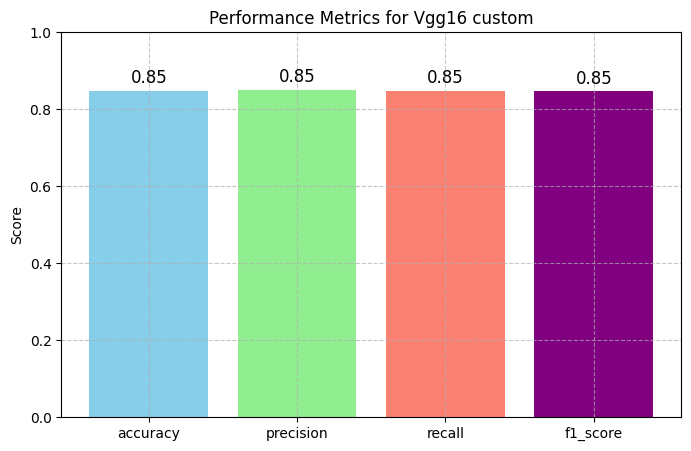

In [13]:
metrics_xception = evaluate_model(custom_xception_model, x_test, y_test)
print(metrics_xception)
plot_loss_curves(history_custom_xception, "Vgg16 custom")
plot_metrics(metrics_xception, "Vgg16 custom")

In [14]:
def build_lenet5(input_shape=(28, 28, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [15]:
# Build and train the modified AlexNet
lenet5 = build_lenet5()
history_lenet5 = compile_and_train(lenet5, x_train, y_train, x_test, y_test, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7178 - loss: 0.7617 - val_accuracy: 0.8460 - val_loss: 0.4276
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8597 - loss: 0.3869 - val_accuracy: 0.8652 - val_loss: 0.3703
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8785 - loss: 0.3328 - val_accuracy: 0.8733 - val_loss: 0.3447
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8915 - loss: 0.2972 - val_accuracy: 0.8818 - val_loss: 0.3265
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8984 - loss: 0.2750 - val_accuracy: 0.8686 - val_loss: 0.3510
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9023 - loss: 0.2621 - val_accuracy: 0.8891 - val_loss: 0.3000
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9100 - loss: 0.2435 - val_accuracy: 0.8902 - val_loss: 0.2902
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9148 - loss: 0.2320 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.86      0.84      1000
           3       0.92      0.88      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.75      0.65      0.70      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000

{'accuracy': 0.8956, 'precision': 0.8954205790467341, 'recall': 0.8956, 'f1_score': 0.8947642761524046}


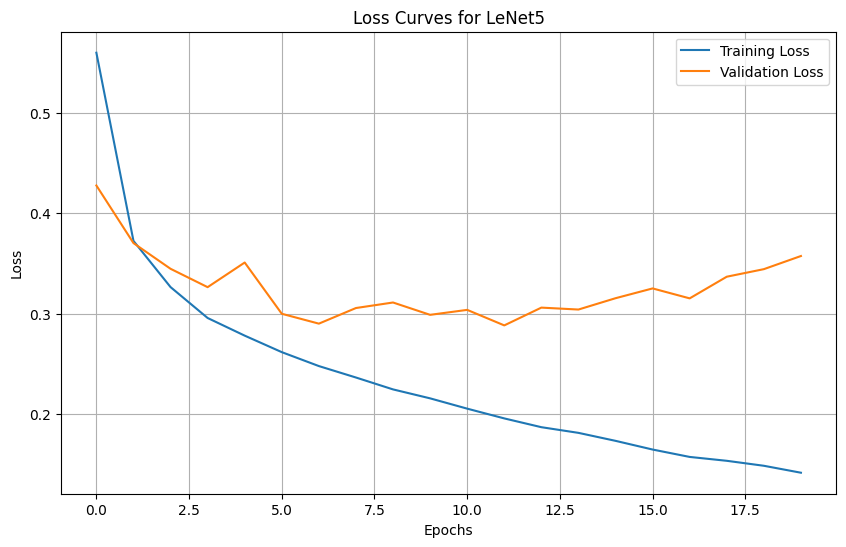

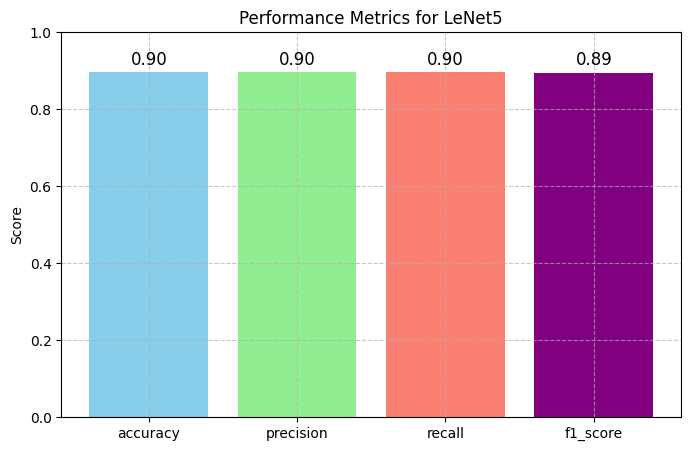

In [16]:
metrics_lenet5 = evaluate_model(lenet5, x_test, y_test)
print(metrics_lenet5)
plot_loss_curves(history_lenet5, "LeNet5")
plot_metrics(metrics_lenet5, "LeNet5")

In [17]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

# Define a residual block
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut connection
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build a custom ResNet model
def build_custom_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Add residual blocks
    x = residual_block(x, filters=32)
    x = residual_block(x, filters=64, stride=2)  # Downsample
    x = residual_block(x, filters=128, stride=2)  # Downsample

    # Global Average Pooling and Dense Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Compile and train the custom ResNet model
custom_resnet_model = build_custom_resnet(input_shape=(28, 28, 1), num_classes=10)
custom_resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_resnet = custom_resnet_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7698 - loss: 0.6482 - val_accuracy: 0.3380 - val_loss: 2.5771
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8939 - loss: 0.2915 - val_accuracy: 0.8095 - val_loss: 0.5321
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9135 - loss: 0.2398 - val_accuracy: 0.8550 - val_loss: 0.4124
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9235 - loss: 0.2105 - val_accuracy: 0.8378 - val_loss: 0.4710
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9339 - loss: 0.1824 - val_accuracy: 0.8920 - val_loss: 0.2956
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9412 - loss: 0.1632 - val_accuracy: 0.9015 - val_loss: 0.2867
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9492 - loss: 0.1445 - val_accuracy: 0.8832 - val_loss: 0.3542
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9564 - loss: 0.1233 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1000
           1       1.00      0.93      0.96      1000
           2       0.79      0.91      0.84      1000
           3       0.82      0.95      0.88      1000
           4       0.96      0.63      0.76      1000
           5       0.93      0.98      0.96      1000
           6       0.79      0.66      0.72      1000
           7       0.95      0.95      0.95      1000
           8       0.66      1.00      0.79      1000
           9       0.99      0.82      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000

{'accuracy': 0.8625, 'precision': 0.8804078002766575, 'recall': 0.8625, 'f1_score': 0.8616538286174003}


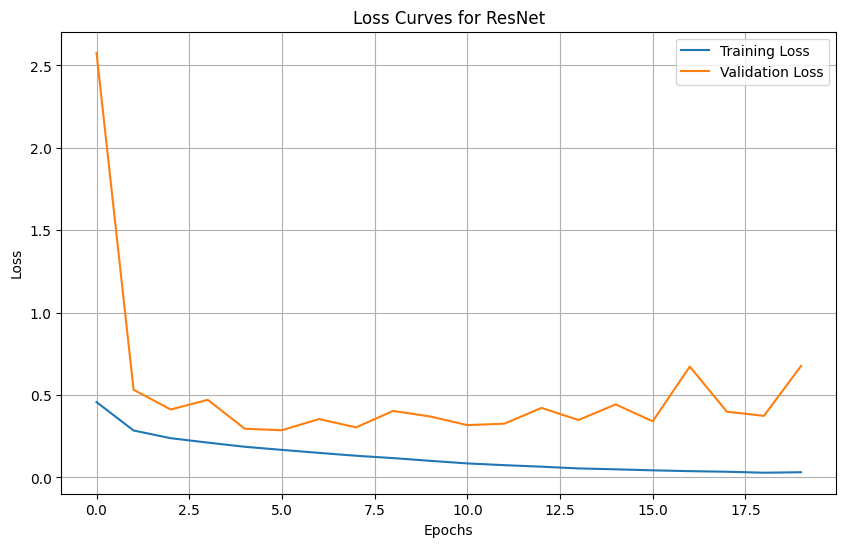

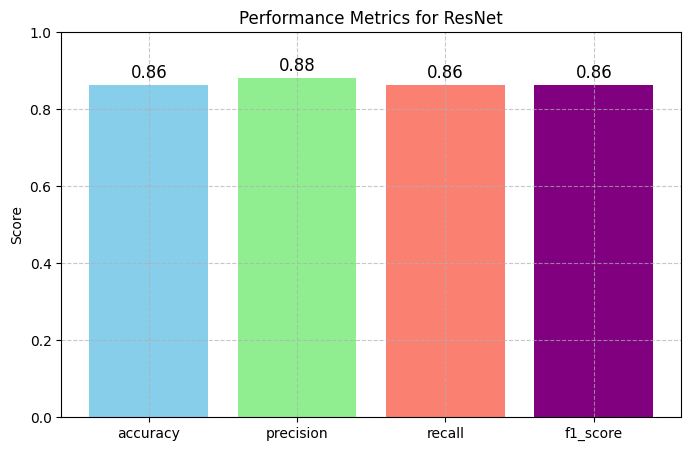

In [18]:
metrics_resnet = evaluate_model(custom_resnet_model, x_test, y_test)
print(metrics_resnet)
plot_loss_curves(history_custom_resnet, "ResNet")
plot_metrics(metrics_resnet, "ResNet")

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Multiply, Add, Input
from tensorflow.keras.models import Model

# Define the squeeze-and-excitation block
def se_block(input, reduction=16):
    channels = input.shape[-1]
    x = GlobalAveragePooling2D()(input)  # Squeeze step
    x = Dense(channels // reduction, activation='relu')(x)  # Dense layer for excitation
    x = Dense(channels, activation='sigmoid')(x)  # Rescale the features

    x = Multiply()([input, x])  # Scale the original input by the learned weights
    return x

# Build a custom SENet model
def build_custom_senet(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Add Squeeze-and-Excitation blocks
    x = se_block(x, reduction=16)

    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = se_block(x, reduction=8)

    # Global Average Pooling and Dense Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Compile and train the custom SENet model
custom_senet_model = build_custom_senet(input_shape=(28, 28, 1), num_classes=10)
custom_senet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_custom_senet = custom_senet_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4913 - loss: 1.5962 - val_accuracy: 0.1218 - val_loss: 3.4542
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7043 - loss: 0.8892 - val_accuracy: 0.3985 - val_loss: 1.6586
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7458 - loss: 0.7404 - val_accuracy: 0.5268 - val_loss: 1.4343
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7664 - loss: 0.6742 - val_accuracy: 0.5654 - val_loss: 1.0879
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7770 - loss: 0.6302 - val_accuracy: 0.6075 - val_loss: 1.1750
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7855 - loss: 0.6001 - val_accuracy: 0.5962 - val_loss: 1.1697
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7969 - loss: 0.5741 - val_accuracy: 0.4645 - val_loss: 2.4081
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8058 - loss: 0.5461 - val_accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1000
           1       1.00      0.71      0.83      1000
           2       0.96      0.15      0.26      1000
           3       0.00      0.00      0.00      1000
           4       0.45      0.81      0.58      1000
           5       0.42      1.00      0.59      1000
           6       0.24      0.03      0.06      1000
           7       1.00      0.02      0.03      1000
           8       0.25      0.98      0.40      1000
           9       0.83      0.76      0.79      1000

    accuracy                           0.45     10000
   macro avg       0.61      0.45      0.36     10000
weighted avg       0.61      0.45      0.36     10000

{'accuracy': 0.4468, 'precision': 0.6148905246340585, 'recall': 0.4468, 'f1_score': 0.35630247572274226}


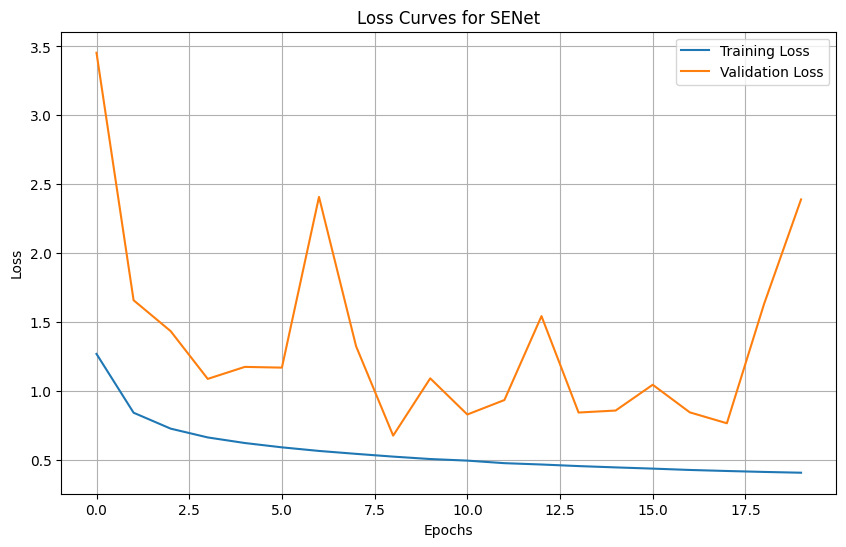

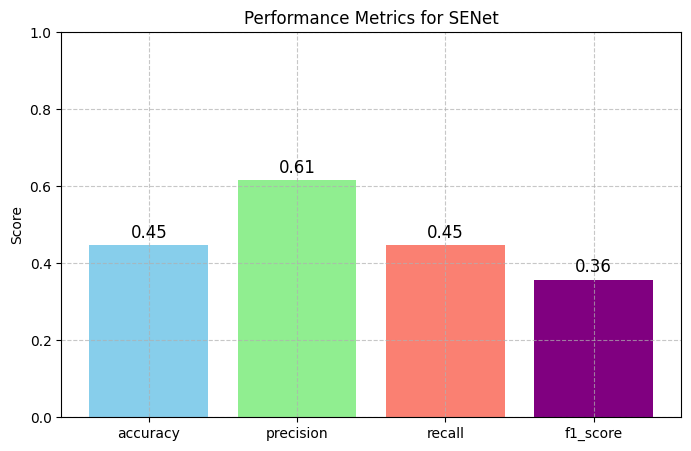

In [20]:
metrics_senet = evaluate_model(custom_senet_model, x_test, y_test)
print(metrics_senet)
plot_loss_curves(history_custom_senet, "SENet")
plot_metrics(metrics_senet, "SENet")

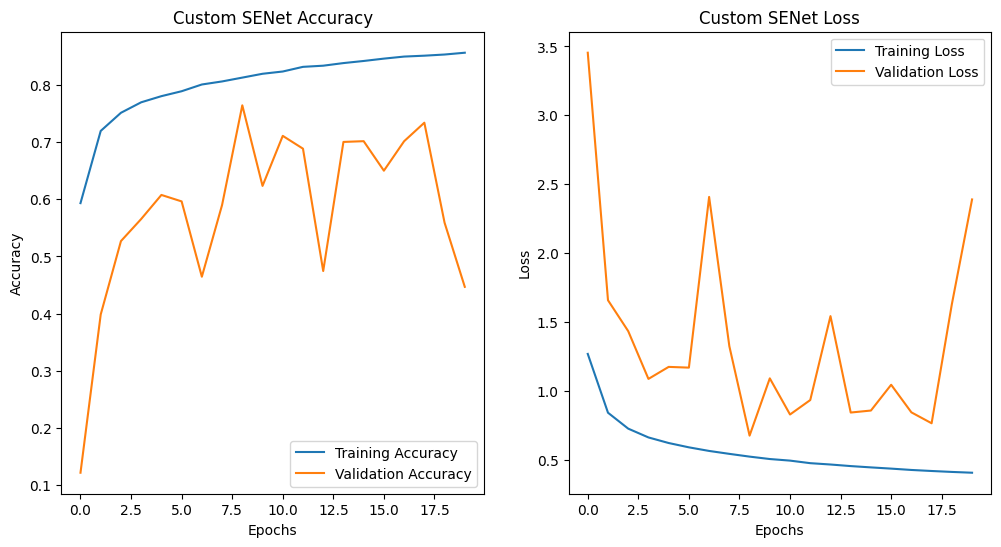

In [21]:
import matplotlib.pyplot as plt

def plot_metrics(history, model_name='Model'):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the performance metrics for Custom SENet
plot_metrics(history_custom_senet, model_name='Custom SENet')


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and calculate metrics
y_pred = custom_senet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.01      0.01      1032
           3       0.12      1.00      0.22      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       1.00      0.03      0.07       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.03     10000
weighted avg       0.11      0.10      0.03     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
